# Regressão Linear
### Prevendo o valor de mercado de uma empresa
- tutorial por @victordhn
- [Linkedin: Victor Dahan](https://www.linkedin.com/in/victor-dahan-04392451/) 

### Alguns pontos (muito) importantes:
- Nesse tutorial a gente vai rodar uma regressão linear simplificada, e portanto, o valor preditivo e a aplicação desse modelo é APENAS ACADÊMICA.
- Para trazer um pouco mais de realidade no modelo, utilizei dados reais, baixados utilizando a API do site fundamentus.com.br (tópico para outro tutorial), e portanto, não esperamos que o resultado do modelo seja perfeito como o obtivo utilizando datasets preparados para esta finalidade.

### Atenção extra para este ponto: 
As variáveis utilizadas no modelo foram escolhidas para fazer o modelo funcionar. Essas não são as melhores variáveis, e nem tem embasamento teórico. Tudo foi feito para que o tutorial ficasse mais claro e objetivo. O foco está na regressão linear, em como obter resultados corretos e confiáveis aplicando este modelo nas suas análises.

### Libraries utilizadas:
- pandas
- numpy
- matplotlib
- seaborn
- sklearn

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

### 1.1 Preparando os dados

- Dataset baixando utilizando API da fundamentus.com.br (vou deixar o dataset disponível em algum lugar do meu github).
- Basicamente, baixei todas informações financeiras sobre as empresas que fazem parte do índice Ibovespa.
- Tenho outro tutorial ensinando a baixar a composicação atualidade de qualquer índice da B3 (no github).

In [2]:
df = pd.read_csv('C:/Users/Victor/Documents/Github/repos/Algoritmos Finanças/dataset_fundamentus.csv')
df.head(5)

,Unnamed: 0,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,...,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m,Cart_de_Credito,Depositos,Result_Int_Financ_12m,Rec_Servicos_12m,Result_Int_Financ_3m,Rec_Servicos_3m
0,RRRP3,RRRP3,ON NM,3R PETROLEUM ON NM,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",32.92,2023-08-31,26.73,50.51,...,478562000,8.365820e+08,1.178710e+08,77016000,NaN,NaN,NaN,NaN,NaN,NaN
1,ALSO3,ALSO3,ON,ALIANSCSONAE ON,Exploração de Imóveis,Exploração de Imóveis,22.77,2023-08-31,15.15,25.47,...,3204330000,6.501810e+08,2.777070e+08,152985000,NaN,NaN,NaN,NaN,NaN,NaN
2,ALPA4,ALPA4,PN N1,ALPARGATAS PN N1,"Tecidos, Vestuário e Calçados",Calçados,8.41,2023-08-31,7.02,23.60,...,-228109000,9.263590e+08,-5.899600e+07,-52853000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABEV3,ABEV3,ON,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,13.84,2023-08-31,12.86,16.03,...,14278000000,1.889810e+10,3.174830e+09,2502970000,NaN,NaN,NaN,NaN,NaN,NaN
4,ARZZ3,ARZZ3,ON NM,AREZZO CO ON NM,Comércio,"Tecidos, Vestuário e Calçados",70.67,2023-08-31,58.96,102.67,...,369973000,1.131020e+09,1.246570e+08,100626000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Unnamed: 0                 object
Papel                      object
Tipo                       object
Empresa                    object
Setor                      object
Subsetor                   object
Cotacao                   float64
Data_ult_cot               object
Min_52_sem                float64
Max_52_sem                float64
Vol_med_2m                  int64
Valor_de_mercado            int64
Valor_da_firma             object
Ult_balanco_processado     object
Nro_Acoes                   int64
PL                          int64
PVP                         int64
PEBIT                      object
PSR                        object
PAtivos                    object
PCap_Giro                  object
PAtiv_Circ_Liq             object
Div_Yield                  object
EV_EBITDA                  object
EV_EBIT                    object
Cres_Rec_5a                object
LPA                         int64
VPA                         int64
Marg_Bruta                 object
Marg_EBIT     

Selecionando as variáveis de interesse:
- Vou utilizar como variável dependente o Valor de Mercado da empresa (variável que queremos prever)
- Para as variáveis independentes do modelo, vou utilizar o EBIT, ROE, LPA, Ativo, Patrimônico Líquido e o Dividend Yield da empresa

In [4]:
df_new = df[['Empresa','Valor_de_mercado','EBIT_12m','ROE','LPA','Ativo','Patrim_Liq','Div_Yield']]

In [5]:
df_new.head(5)

,Empresa,Valor_de_mercado,EBIT_12m,ROE,LPA,Ativo,Patrim_Liq,Div_Yield
0,3R PETROLEUM ON NM,7900300000,4.228010e+08,9.1%,199,18679400000,5252820000,0.0%
1,ALIANSCSONAE ON,13068500000,8.557360e+08,21.8%,558,28202200000,14673500000,2.3%
2,ALPARGATAS PN N1,5744550000,2.201080e+08,-4.3%,-33,7766710000,5309890000,0.0%
3,AMBEV S/A ON,218033000000,1.629430e+10,16.8%,91,133294000000,85074600000,5.5%
4,AREZZO CO ON NM,7843590000,4.877970e+08,13.3%,333,5435060000,2783100000,2.2%


- Nessa etapa estou só me assegurando que todas variáveis são numéricas e que não terei outliers no dataset (você pode pular caso seu dataset já está limpo e preparado)

In [6]:
df_new['ROE'] = df_new['ROE'].str.rstrip("%").astype(float)
df_new['Div_Yield'] = df_new['Div_Yield'].str.rstrip("%").astype(float)
df_new = df_new.fillna(0)

In [7]:
df_new.dtypes

Empresa              object
Valor_de_mercado      int64
EBIT_12m            float64
ROE                 float64
LPA                   int64
Ativo                 int64
Patrim_Liq            int64
Div_Yield           float64
dtype: object

In [8]:
columns_of_interest = ['Valor_de_mercado','EBIT_12m','ROE','LPA','Ativo','Patrim_Liq','Div_Yield']

Cuidando para evitar outliers

In [9]:
for col in columns_of_interest:
    mean = df_new[col].mean()
    std = df_new[col].std()
    lower_bound = mean - 2 * std  # Adjust the multiplier as needed
    upper_bound = mean + 2 * std  # Adjust the multiplier as needed
    df_new[col] = df_new[col].apply(lambda x: mean if x == 0 or x < lower_bound or x > upper_bound else x)

In [10]:
df_new.head(5)

,Empresa,Valor_de_mercado,EBIT_12m,ROE,LPA,Ativo,Patrim_Liq,Div_Yield
0,3R PETROLEUM ON NM,7.900300e+09,4.228010e+08,9.1,199.0,1.867940e+10,5.252820e+09,4.596471
1,ALIANSCSONAE ON,1.306850e+10,8.557360e+08,21.8,558.0,2.820220e+10,1.467350e+10,2.300000
2,ALPARGATAS PN N1,5.744550e+09,2.201080e+08,-4.3,-33.0,7.766710e+09,5.309890e+09,4.596471
3,AMBEV S/A ON,4.997193e+10,1.629430e+10,16.8,91.0,1.332940e+11,8.507460e+10,5.500000
4,AREZZO CO ON NM,7.843590e+09,4.877970e+08,13.3,333.0,5.435060e+09,2.783100e+09,2.200000


### 1.2 Testando algumas premissas antes de começar

- Algumas premissas são necessárias para que um modelo de regressão linear seja válido.

Primeiramente vamos testar 2 delas: 
- A relação entre as variáveis dependente e independentes precisa ser linear. Podemos testar com gráficos plotando cada para de variáveis dependente x independente
- Vamos testar apenas a variável "Ativo" aqui, mas você deve realizar o procedimento para cada variável

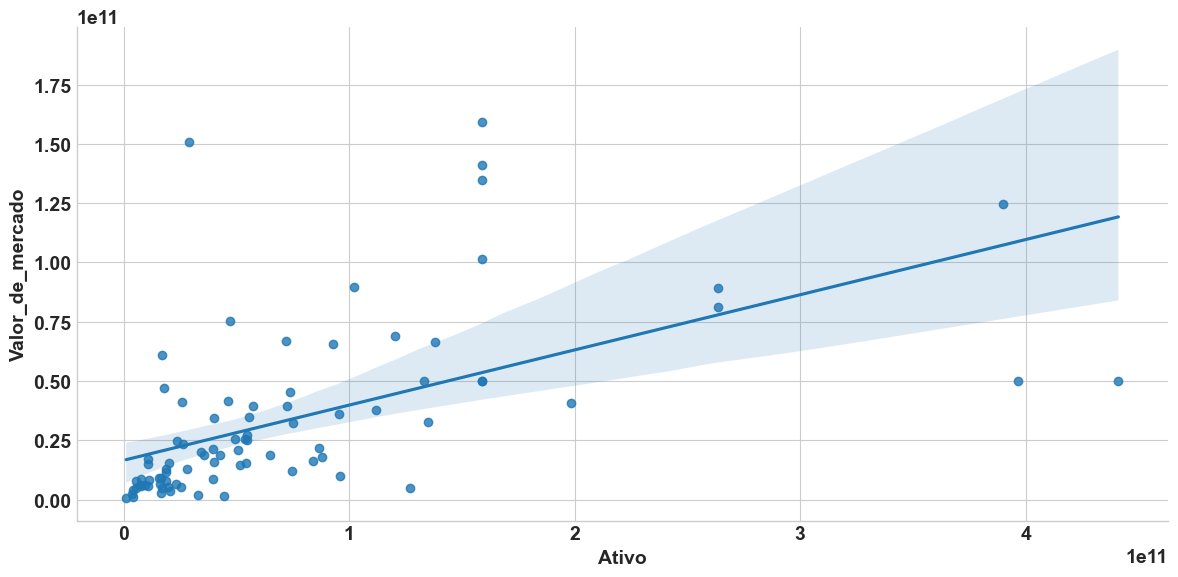

In [11]:
# Aparentemente existe uma relação linear, onde quanto maior o ativo, maior o valor de mercado da empresa (a relação não precisa ser perfeitamente linear)
sns.lmplot(x='Ativo',y='Valor_de_mercado',data=df_new,aspect=2,height=6)

Teste de correlação:
- A segunda premissão é que a correlação entre as variáveis independentes precisa ser baixa, pelo menos menor que 0.7 (mais tarde utilizaremos um índice chamado VIF para testar essa mesma premissa)

<Axes: >

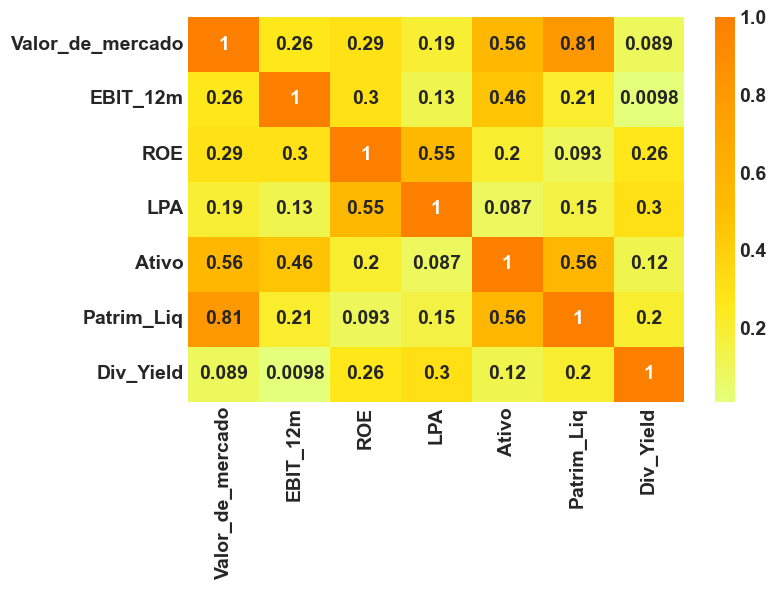

In [12]:
# Novamente, aparentemente as correlações entre as variáveis independentes parecem ser baixar o suficiente
corr = df_new.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

### 2. Rodando o modelo de Regressão Linear

- Finalmente, vamos rodar o modelo de regressão linear.
- Vamos utilizar o pacote sklearn para rodar o modelo.
- Vamos também separar o nosso dataset em 2 blocos: bloco de treino e bloco de teste. Isso evita o que chamamos de overfitting, que é quando o modelo se adapta demais ao seu dataset e não consegue obter a mesma performance e datasets diferentes

In [13]:
from sklearn.linear_model import LinearRegression #importanto o modelo de regressão
from sklearn.model_selection import train_test_split #importando o pacote para separar o dataset em teste e treino
from sklearn.metrics import mean_squared_error #importando uma das métricas pra testar a eficiência do modelo: RMSE
from sklearn.metrics import r2_score #importando outra métrica pra testar eficiência do modelo: R2


# Esta parte só ajusta alguns parâmetros de visualização das tabelas, pra facilitar nossa vida
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

- Na ordem, o que faremos é:
- (1) Definir as variáveis que serão utilizadas na regressão.
- (2) Separar o dataset nos 2 blocos: teste e treino
- (3) Definir o modelo em si e armazena-lo na variável model_lr
- (4) Rodar o modelo e gerar os valores previstos de acordo com o modelo para cada uma das nossas empresas

In [14]:
features = ['EBIT_12m','ROE','LPA','Ativo','Patrim_Liq','Div_Yield']
target = ['Valor_de_mercado']

In [15]:
X = df_new[features].values.reshape(-1,6)
y = df_new[target].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=0)

In [16]:
model_lr = LinearRegression()

In [17]:
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X)

### 3. Resultado do Modelo
- Estamos interessados nos coeficientes da regressão. Vou utilizar aqui os coeficientes gerados pelo pacote sklearn.
- Para a maioria dos casos, isso basta, mas irei avançar e utilizar outro pacote onde é possível ver o nível de significância de cada variável

In [18]:
print("Intercept:", model_lr.intercept_)
print("Coefficient(s):", model_lr.coef_)

Intercept: [1.11062031e+10]
Coefficient(s): [[ 5.26107631e-01  8.34000060e+08 -2.02832298e+07  4.63480949e-02
   7.75141180e-01 -2.12556023e+09]]


- O pacote pingouin não é o meu preferido, mas com ele nós podemos ver facilmente o P-VALUE de cada variável do modelo.
- Em resumo, o p-value é um teste estatístico de significância de uma variável, e a forma mais comum de se interpretar é que valores abaixo 0.1 indicam que a variável tem valor preditivo significativo no modelo
- No nosso caso, as variáveis Ativo e EBIT não teriam valor preditivo significativo, por terem um p-value acima de 0.1
- De qualquer forma, manteremos essas variáveis no modelo já que estamos interessados apenas no valor acadêmico deste

In [19]:
import pingouin as pg
X = df_new.drop(['Valor_de_mercado','Empresa'],axis=1)
y = df_new['Valor_de_mercado']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)
lm = pg.linear_regression(X_train, y_train)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,11106214055.91,0.00,152880602960548528128.00,0.00,0.78,0.75,11106214055.91,11106214055.91
1,EBIT_12m,0.53,0.83,0.63,0.53,0.78,0.75,-1.15,2.20
2,ROE,833999802.80,0.00,363263063247708288.00,0.00,0.78,0.75,833999802.80,833999802.80
3,LPA,-20283228.65,0.00,-930056212321533.38,0.00,0.78,0.75,-20283228.65,-20283228.65
4,Ativo,0.05,0.05,1.00,0.32,0.78,0.75,-0.05,0.14
5,Patrim_Liq,0.78,0.09,8.36,0.00,0.78,0.75,0.59,0.96
6,Div_Yield,-2125560229.81,0.00,-4753525766951019520.00,0.00,0.78,0.75,-2125560229.81,-2125560229.81


## 4. Testando o modelo
- Para testar o modelo vamos utilizar 2 métricas, o RMSE e o R2
- O RMSE nos informa a média da soma dos erros quadrados do modelo. Esta métrica só é verdadeiramente útil quando comparada com o RMSE de outros modelos. Em uma aplicação real, diversos modelos diferentes são rodados e então seus RMSE são comparados em busca do modelo que apresenta a menor média dos erros
- O R2 (r-quadrado) nos informa a porcentagem da variação nos resultados que é explicada pelo modelo. Em termos gerais, um R2 de 70% nos informa que o modelo é capaz de capturar 70% da variação daquilo que queremos prever.


### 3.1 Testando o modelo: RMSE
"Soma dos erros" (ou média da soma dos erros ao quadrado)
- Este valor só faz sentido se comparado com RMSE de outros modelos de previsão do valor de mercado da empresa.

In [20]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(f"rmse = {rmse:.2f}")

rmse = 20154598780.75



### 3.2 Testando o modelo: R2
Qual porcentagem da variação é explicada pelo modelo
- No nosso caso, o modelo captura 68% da variação na variável "valor de mercado", o que é considerado um valor bom.

In [21]:
r2 = r2_score(y,y_pred)
print(f"R2 = {r2:.2f}")

R2 = 0.68


### 4. Nossa primeira previsão: Valor de mercado da MOVIDA
- Vamos finalmente utilizar o modelo para prever o valor de mercado de um empresa que NÃO está no nosso dataset.
- Vamos utilizar o caso da empresa MOVIDA, empresa de aluguel de carros que não faz parte do índice IBOV

In [22]:
# Aqui nós passamos os valores do EBIT, ROE, LPA, Ativo, PL e Div. Yield, nesta ordem, na função predict

prediction = model_lr.predict(np.array([[2387900000,3.7,0.32,21069900000,3072100000,3.4]]))
print(f"O valor da firma da MOVIDA é de: {np.squeeze(prediction):.2f}")

O valor da firma da MOVIDA é de: 11572761276.58


- O valor previsto da MOVIDA foi de cerca de 11 Bilhoes de reais, enquanto seu valor de mercado real, no momento que realizei essa consulta é de cerca 6 Bilhoes de reais.
- Para um modelo amador, feito com os dados mais simples possíveis, e de forma puramente acadêmica, foi um resultado até que surpreendente.
- Isso mostra o poder que a regressão linear tem para previsões de variáveis númericas e contínuas

### 5. Mais algumas premissas:

### 5.1 conferindo a normalidade dos erros
- Essa é mais uma premissa importante, que deixei pro final pois precisa do modelo pronto.
- Os erros da regressão linear precisam seguir uma distribuição normal, com média 0 (ou razoavelmente próximo de zero).
- Vamos testar isso fazendo uma histograma dos erros.
- Nosso modelo passou no teste!

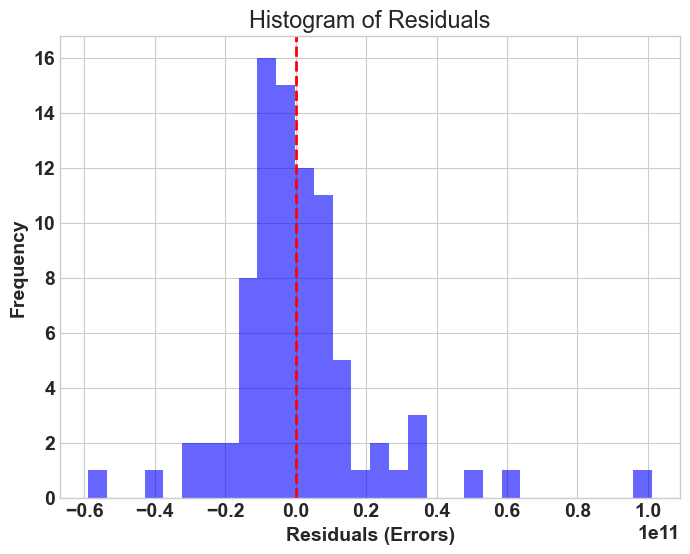

In [23]:
y = df_new[target].values.reshape(-1,1)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.6)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5.2 conferindo (novamente) a correlação entre as variáveis independentes (VIF index)
- Com modelo pronto, uma métrica que podemos utilizar para testar a correlação entre as variáveis independentes é o VIF.
- Um VIF abaixo de 5 nos dá uma segurança que não temos problemas de correlação.
- Um VIF entre 5 e 15 irá demandar uma análise par-a-par das correlações, como fizemos no começo do tutorial
- Um VIF acima de 15 nos indica que (quase) certamente temos problemas de correlação nas variáveis independentes.
- No nosso caso, como era de se esperar, o VIF é bem pequeno.

In [24]:
# VIF
VIF = 1/(1-r2)
VIF

3.1558478718062686

### Finalizamos aqui o tutorial sobre Regressão Linear aplicada ao mercado financeiro. 

### Este tutorial cobre todos requisitos básicos para uma regressão linear correta mas existem centenas de modificações para tornar suas regressão mais precisa e confiável. 

- Recomendo os livros do Wooldridge para quem quiser ir mais a fundo nos detalhes.
- Qualquer dúvida, pode me contatar no github, linkedin ou twitter.